# Final Notebook 003 -  Data Analysis (Pointwise Mutual Information and Daily-wide Clustering)

## Import

In [1]:
import sentisignal
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np 
import pylab as P 
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import scipy.stats as s
import statsmodels.api as sm
import pprint
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from datetime import datetime
from yahoo_finance import Share
from pandas_datareader import data, wb
from statsmodels.graphics.api import qqplot
from operator import itemgetter
from decimal import *
from sklearn.neighbors.kde import KernelDensity

# plt.style.use('ggplot')
# sns.set_style("darkgrid")
# sns.set_context("notebook")

## Configuration

In [3]:
data_primary_path = '../../data/csv/stocktwits_twitter_withretweets_daily.csv'
data_symbology_path = '../../data/csv/symbology.csv'
data_pickles_path = '../../data/pickles/'
data_nasdaq_company_list_path = '../../data/nasdaq/companylist.csv'
start_date = '2012-01-01'
end_date = '2016-01-01'

## Reload Data

In [4]:
data_symbology = pd.read_csv(data_symbology_path)

### Use NASDAQ data to get top 100 companies by MarketCap

In [5]:
data_nasdaq_company_list = pd.read_csv(data_nasdaq_company_list_path)
data_nasdaq_top_100_mkt_cap = data_nasdaq_company_list.head(100)
data_nasdaq_top_100_mkt_cap_symbols = data_nasdaq_top_100_mkt_cap['Symbol'].unique()

### Load results from intermediate pickle

In [6]:
data_nasdaq_top_100_preprocessed_merge = pd.read_pickle(data_pickles_path+'intermediate/'+'data_nasdaq_top_100_preprocessed_merge_'+start_date+'_'+end_date)

### Load window results from intermediate pickle

In [7]:
data_nasdaq_top_100_preprocessed_merge_window_30 = pd.read_pickle(data_pickles_path+'intermediate/'+'data_nasdaq_top_100_preprocessed_merge_'+start_date+'_'+end_date+'_window_30')

## Data Analytics (No window)

### MI (Mutual Information)

In [10]:
# def shift
data_nasdaq_top_100_preprocessed_mi_res = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1, True)
# def shift (validate)
data_nasdaq_top_100_preprocessed_mi_res_validate = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1, False)

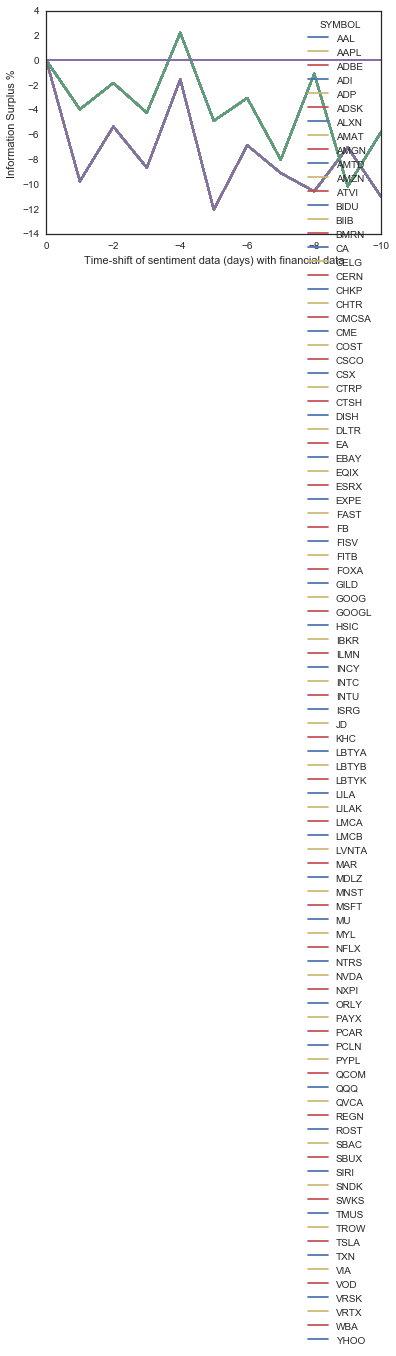

In [11]:
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_mi_res)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


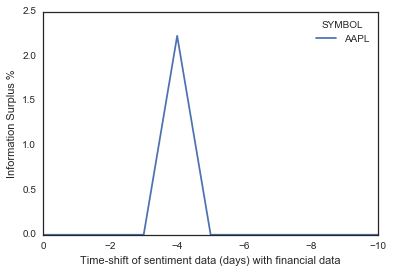

In [9]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net.head()

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'RTISf', 'VOLUME', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

In [ ]:
data_nasdaq_top_100_preprocessed_merge_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'VOLATILITY', -1)
data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_merge_mi_res_net_constrained)

### PMI (Pointwise Mutual Information)
#### Form a time series of mutual information values from single events per company

In [ ]:
data_nasdaq_top_100_preprocessed_merge.info()

In [ ]:
data_nasdaq_top_100_preprocessed_merge_daily_pmi = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, ['SYMBOL'], sentisignal.net_daily_pmi_info_surplus, 2, 'PCA_SENTIMENT', 'PCA_FINANCE')

In [ ]:
data_nasdaq_top_100_preprocessed_merge_daily_pmi.head(50)

In [ ]:
data_nasdaq_top_100_preprocessed_merge_daily_pmi = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, ['SYMBOL'], sentisignal.daily_pmi_info_surplus, 2, 'PCA_SENTIMENT', 'PCA_FINANCE', True)
data_nasdaq_top_100_preprocessed_merge_daily_pmi.head()

In [ ]:
data_nasdaq_top_100_preprocessed_merge_daily_pmi_valid = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, ['SYMBOL'], sentisignal.daily_pmi_info_surplus, 2, 'PCA_SENTIMENT', 'PCA_FINANCE', False)
data_nasdaq_top_100_preprocessed_merge_daily_pmi_valid.head()

In [ ]:
df_pmi_merge = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge, ['SYMBOL'], sentisignal.net_daily_pmi_info_surplus, 2, 'PCA_SENTIMENT', 'PCA_FINANCE')

In [ ]:
df_pmi_merge.head(50)

In [ ]:
# data_nasdaq_top_100_preprocessed_merge.groupby('SYMBOL')
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

df = data_nasdaq_top_100_preprocessed_merge

fig, ax = plt.subplots(figsize=(15,5))
for key, grp in df.groupby('SYMBOL'):
#     print "key", key
#     grp.reset_index()
#     print grp.DATE
    ax.plot(grp.DATE.reset_index(drop=True), grp['PMI_0'], label=key)
#     grp['D'] = pd.rolling_mean(grp['B'], window=5)    
#     plt.plot(grp['D'], label='rolling ({k})'.format(k=key))

# datemin = (df.DATE.min().year)
# datemax = (df.DATE.max().year + 1)
# print datemin, datemax
# ax.set_xlim(datemin, datemax)


plt.legend(loc='best')
plt.ylabel('PMI')
fig.autofmt_xdate()
plt.show()

#### Shift finance data and and calculate PMI (per company)


## Data Analytics (with window)

### MI (Mutual Information)

In [ ]:
# def shift
data_nasdaq_top_100_preprocessed_window_30_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge_window_30, 'SYMBOL', sentisignal.net_information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1)
data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained)

In [ ]:
# def shift
data_nasdaq_top_100_preprocessed_window_30_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_100_preprocessed_merge_window_30, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1)
data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_100_preprocessed_window_30_mi_res_net_constrained)